# Kernel Density Estimation

In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt

# randomly generate 100 data points at 1-D for KDE
N = 100
np.random.seed(1)
Xkde = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]

# display the data for density estimation
print("This is the dataset:\n {} \n".format(Xkde.flatten()))

This is the dataset:
 [ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.3015387
  1.74481176 -0.7612069   0.3190391  -0.24937038  1.46210794 -2.06014071
 -0.3224172  -0.38405435  1.13376944 -1.09989127 -0.17242821 -0.87785842
  0.04221375  0.58281521 -1.10061918  1.14472371  0.90159072  0.50249434
  0.90085595 -0.68372786 -0.12289023 -0.93576943 -0.26788808  0.53035547
  4.30833925  4.60324647  4.3128273   4.15479436  4.32875387  4.9873354
  3.88268965  5.2344157   6.65980218  5.74204416  4.80816445  4.11237104
  4.25284171  6.6924546   5.05080775  4.36300435  5.19091548  7.10025514
  5.12015895  5.61720311  5.30017032  4.64775015  3.8574818   4.65065728
  4.79110577  5.58662319  5.83898341  5.93110208  5.28558733  5.88514116
  4.24560206  6.25286816  5.51292982  4.70190716  5.48851815  4.92442829
  6.13162939  6.51981682  7.18557541  3.60350366  3.55588619  4.49553414
  5.16003707  5.87616892  5.31563495  2.97779878  4.69379599  5.82797464
  5.23009474  5.76201118  4.777

### KDE using scikit-learn

Function: [***KernelDensity***](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KernelDensity.html) in scikit-learn

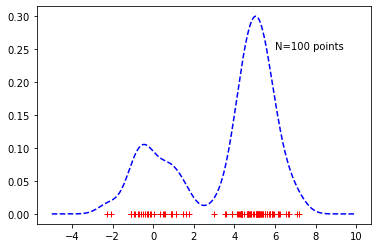

In [2]:
from sklearn.neighbors import KernelDensity

# perform KDE
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(Xkde)

# prepare the grid
X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

# evaluate the log density model on the data using the KDE 
log_dens = kde.score_samples(X_plot)

# plot the data distribution and probability density function
plt.plot(X_plot[:, 0], np.exp(log_dens), 'b--')
plt.plot(Xkde[:, 0], np.zeros(Xkde.shape[0]), '+r')   
plt.text(6, 0.25, "N={0} points".format(N), horizontalalignment='left' )
plt.show()

#### Plot by seaborn

Function: [***displot***](https://seaborn.pydata.org/generated/seaborn.displot.html) in seaborn

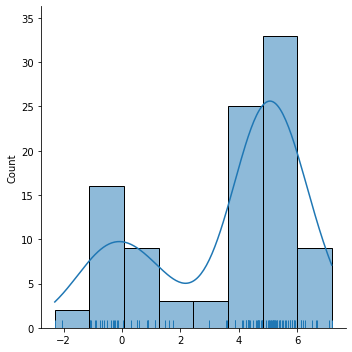

In [3]:
# the KDE and density profile can also be plotted via the seaborn package

import seaborn as sns
sns.displot(Xkde.flatten(), kde=True, rug=True)
plt.show()

#### Get the Probability Density Value

In [4]:
# Get the probability density value for a given datapoint xtest

xtest = 5.2   # given datapoint

# get the log-likelihood of the data samples from KDE
log_dens = kde.score_samples(np.asarray(xtest).reshape(-1,1))

# get PDF based on the log-likelihood 
pdf = np.exp(log_dens)
print("\n The probability density function value at {} is {:8.5f}".format(xtest, pdf[-1]) )


 The probability density function value at 5.2 is  0.29613


#### Get the Cumulative Distribution Function Value

In [5]:
# Compute cumulative distribution function (CDF) at a given datapoint

xtest = 5.2   # given datapoint

dx = 0.001  # define the step size

# generate values in the range from -100 (a sufficiently small number) to the test point
xgrid = np.arange(-100, xtest, dx).reshape(-1,1)   

# get the log-likelihood of the data samples from KDE
log_dens = kde.score_samples(xgrid)

# get PDF based on the log-likelihood 
pdf = np.exp(log_dens)

# approximate the integral of the PDF
cdf = np.sum(pdf * dx)

# print out the results
print("\n The cumulative density function value at {} is {:5.4f}".format(xtest, cdf) )
print("\n The probability density function value at {} is {:5.4f}".format(xtest, pdf[-1]) )


 The cumulative density function value at 5.2 is 0.6837

 The probability density function value at 5.2 is 0.2962


In [6]:
# An alternative way to run integration from -inf to xtest to compute CDF

xtest = 5.2   # given datapoint

start = -100 # pick a sufficiently small number to approximate -inf
Nsteps = 10000 # number of intervals between the "start" and the "xtest"

step = (xtest - start) / (Nsteps - 1)  # calculates the step size
xgrid = np.linspace(start, xtest, Nsteps)[:, np.newaxis]  # generate values in the range from -inf to the test point
log_dens = kde.score_samples(xgrid)   # get the log-likelihood of the data samples from KDE
pdf = np.exp(log_dens)  # get PDF values for each xgrid
cdf = np.sum(pdf * step)  # approximate the integral of the PDF

print("\n The cumulative density function value at {} is {:5.4f}".format(xtest, cdf) )
print("\n The probability density function value at {} is {:5.4f}".format(xtest, pdf[-1]) )


 The cumulative density function value at 5.2 is 0.6854

 The probability density function value at 5.2 is 0.2961


### KDE using SciPy

Function: [***integrate***](https://docs.scipy.org/doc/scipy/reference/integrate.html#module-scipy.integrate) in SciPy

Function: [***gaussian_kde***](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html) in SciPy

In [7]:
# The integral could be performed by SciPy package scipy.integrate
from scipy import integrate

# define a function
def func(x):
    """This function returns the probability density function value of a given query"""
    x_arr = np.asarray(x).reshape(-1,1)
    pdf = np.exp(kde.score_samples(x_arr))[0]
    return pdf
  
# SciPy's Integrate func from a to b (possibly infinite interval) using a technique from the Fortran library QUADPACK.
cfd_scipy, error = integrate.quad(func, -np.inf, xtest)

print("\n The cumulative density function value at {} is {:5.4f}, using SciPy integral function".format(xtest, cfd_scipy) )


 The cumulative density function value at 5.2 is 0.6838, using SciPy integral function


In [8]:
import scipy.stats

kde = scipy.stats.gaussian_kde(list(Xkde.flatten()) )

print(kde.pdf(xtest))

cdf = kde.integrate_box_1d(-100, xtest)

print("\n The cumulative density function value at {} is {:5.4f}".format(xtest, cdf) )

[0.21479941]

 The cumulative density function value at 5.2 is 0.6717
